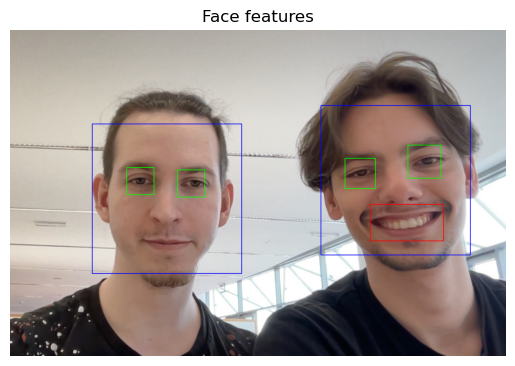

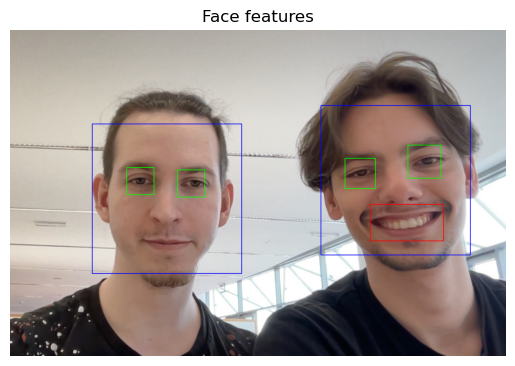

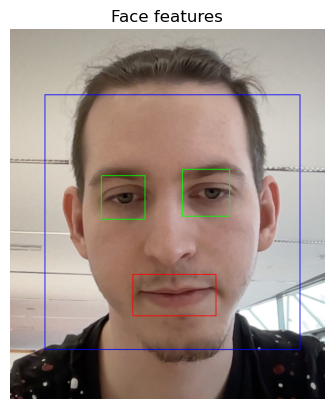

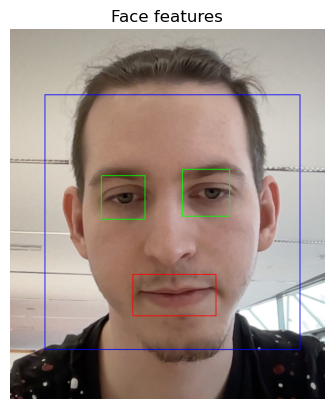

In [3]:
import cv2
import glob
import matplotlib.pyplot as plt

def process_image(image_path):
    # load pre-trained models
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')


    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # detect face
    faces = face_cascade.detectMultiScale(gray, 1.5, 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

        roi_gray = gray[y:y + h, x:x + w]
        roi_color = image[y:y + h, x:x + w]

        # detect eyes
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.35, 10)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

        # detect smile
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.7, 22)
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 0, 255), 2)

    # change image back to rgb
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # show image
    plt.imshow(image_rgb)
    plt.title('Face features')
    plt.axis('off')
    plt.show()

# load all images
image_paths = glob.glob("images/*.jpg")

# run detection for all images
for image_path in image_paths:
    process_image(image_path)


In [4]:
import cv2

# load pre-trained models
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
glasses_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')

face_min_size = (100, 100)
eye_min_size = (60, 60)
glasses_min_size = (150, 150)

# create a video capture object for the built-in camera
cap = cv2.VideoCapture(0)

while True:
    # read a frame from the video capture object
    ret, frame = cap.read()

    if not ret:
        break

    # convert frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect face
    faces = face_cascade.detectMultiScale(gray, 1.35, 5, 0, face_min_size)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # detect eyes
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.35, 10, 0, eye_min_size)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

        # detect smile
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.35, 120)
        # smiles = smile_cascade.detectMultiScale(roi_gray, 1.7, 22)
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 0, 255), 2)

        # # detect glasses
        # glasses = glasses_cascade.detectMultiScale(roi_gray, 1.1, 20, 0, glasses_min_size)
        # for (sx, sy, sw, sh) in glasses:
        #     cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (66, 245, 185), 2)


    # show the video stream in a window
    cv2.imshow('Face features', frame)

    # wait for a key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release the video capture object and close the window
cap.release()
cv2.destroyAllWindows()

for i in range (1,5):
    cv2.waitKey(1)
